<a href="https://colab.research.google.com/github/marcelodepaoli/Controle/blob/main/10_Sintonia_de_PID_(Ziegler_Nichols).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#resolvendo o sistema

#importa a bibliotéca simbólica
import sympy
#define as variáveis
s,vc1,vout,il,iR1,iR2,vin,R1,R2,C1,C2,L = sympy.symbols('s,vc1,vout,il,iR1,iR2,vin,R1,R2,C1,C2,L')
#valor dos componentes
R1=100; R2=1; C1=0.1; C2=1; L=1 #comente essa linha para solução geral
#equações
eq1 = vc1 + R1*iR1 - vin
eq2 = vout - vc1 + L*s*il + R2*iR2
eq3 = -C1*s*vc1 + iR1 - iR2
eq4 = iR2 - il
eq5 = C2*s*vout - il
#resolve o sistema
solucao = sympy.solve([eq1,eq2,eq3,eq4,eq5],(vout,vc1,il,iR1,iR2))
#mostra a solucação
print('vout = ')
sympy.pprint(solucao[vout])

vout = 
               vin               
─────────────────────────────────
      3         2                
10.0⋅s  + 11.0⋅s  + 111.0⋅s + 1.0


In [ ]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
#Código para o ganho crítico e período crítico
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

#Define a função de transferência da planta
s = ctl.TransferFunction.s
P_s=1/(10*s**3 + 11*s**2 + 111*s + 1)
print('FT = ',P_s)

#calcula o ganho crítico e a freq de oscilação
out_st_magn = ctl.stability_margins(P_s)
K_cr = out_st_magn[0]
W_cr = out_st_magn[3]
T_cr = 2*np.pi/W_cr
print('K de oscilação = ', np.round(K_cr,2))
print('T de oscilação = ', np.round(T_cr,2))

FT =  
             1
---------------------------
10 s^3 + 11 s^2 + 111 s + 1

K de oscilação =  121.1
T de oscilação =  1.89


Kp =  72.66
Ki =  77.06
Kd =  17.13


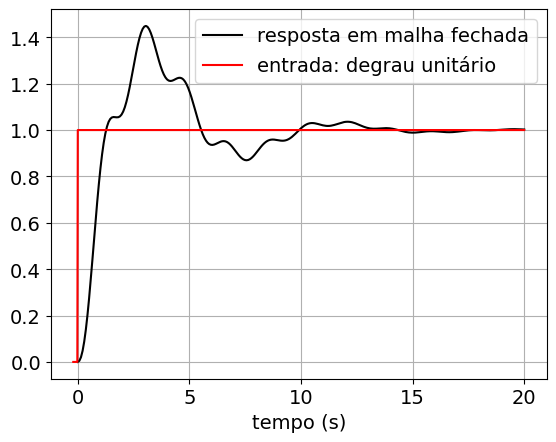

In [ ]:
#Controlador PID Ziegles-Nichols da frequência
Kp = 0.6*K_cr; Ki = 1.2*K_cr/T_cr; Kd = 0.075*K_cr*T_cr
print('Kp = ', round(Kp,2))
print('Ki = ', round(Ki,2))
print('Kd = ', round(Kd,2))
C_s = (Ki + Kp*s + Kd*s**2)/s

#calcula FT em malha fechada
H_s = 1
G_s = ctl.series(C_s, P_s)
G1_s = ctl.feedback(G_s, H_s, sign=-1)

#calcula a resposta ao degrau do PID sintonizado
Tsim = 20
T,yout = ctl.step_response(G1_s, Tsim)
plt.rcParams.update({'font.size':14})
plt.figure()
plt.plot(T,yout,'k-',label="resposta em malha fechada")
plt.grid()

#calcula um degrau unitário
T2 = np.linspace(-0.2,Tsim,1000)
degrau = np.ones_like(T2)
degrau[T2<0]=0
plt.plot(T2,degrau,'r-',label="entrada: degrau unitário")
plt.xlabel('tempo (s)')
plt.legend()